In [22]:
from dds.configs.config import set_task, get_config
from dds.train_dds import train_dds

import numpy as onp

In [23]:
funnel_config = get_config()

# Time and step settings (Need to be done before calling set_task)
funnel_config.model.tfinal = 6.4
funnel_config.model.dt = 0.05
if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"

funnel_config = set_task(funnel_config, "mixture_well")
funnel_config.model.reference_process_key = "oudstl"

print(funnel_config.model.sigma, funnel_config.model.alpha, funnel_config.model.exp_dds)
if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"
    
    # Opt setting for funnel
    funnel_config.model.sigma = 1.075
    funnel_config.model.alpha = 0.6875
    funnel_config.model.m = 1.0
        
    # Path opt settings    
    funnel_config.model.exp_dds = True


funnel_config.model.stl = False
funnel_config.model.detach_stl_drift = False

funnel_config.trainer.notebook = True
funnel_config.trainer.epochs = 11000
# Opt settings we use
# funnel_config.trainer.learning_rate = 0.0001
funnel_config.trainer.learning_rate = 5 * 10**(-3)
funnel_config.trainer.lr_sch_base_dec = 0.99 # For funnel

1.15 0.4 False


In [24]:
funnel_config.model.reference_process_key 

'oudstl'

In [25]:
funnel_config.model.input_dim

2

In [26]:
funnel_config.model.step_scheme_key

'cos_sq'

In [27]:
funnel_config.model.ts.shape

(128,)

In [28]:
funnel_config.trainer.epochs =  300
out_dict = train_dds(funnel_config)

('epoch: %s %s  loss: %s', 0, 'TRAIN', 2.0079028606414795)
('epoch: %s %s  loss: %s', 1, 'TRAIN', 2.006511688232422)
('epoch: %s %s  loss: %s', 2, 'TRAIN', 2.0847692489624023)
('epoch: %s %s  loss: %s', 3, 'TRAIN', 2.0960519313812256)
('epoch: %s %s  loss: %s', 4, 'TRAIN', 1.8804054260253906)
('epoch: %s %s  loss: %s', 5, 'TRAIN', 1.783375859260559)
('epoch: %s %s  loss: %s', 6, 'TRAIN', 1.6275897026062012)
('epoch: %s %s  loss: %s', 7, 'TRAIN', 1.4635274410247803)
('epoch: %s %s  loss: %s', 8, 'TRAIN', 1.4919525384902954)
('epoch: %s %s  loss: %s', 9, 'TRAIN', 1.382371425628662)
('epoch: %s %s  loss: %s', 10, 'TRAIN', 1.3311539888381958)
('epoch: %s %s  loss: %s', 11, 'TRAIN', 1.2797551155090332)
('epoch: %s %s  loss: %s', 12, 'TRAIN', 1.2745784521102905)
('epoch: %s %s  loss: %s', 13, 'TRAIN', 0.9898515939712524)
('epoch: %s %s  loss: %s', 14, 'TRAIN', 1.0377618074417114)
('epoch: %s %s  loss: %s', 15, 'TRAIN', 0.783276379108429)
('epoch: %s %s  loss: %s', 16, 'TRAIN', 0.811636924743

In [29]:
out_dict[-1].keys()

dict_keys(['elbo', 'is', 'pf', 'elbo_eval', 'is_eval', 'pf_eval', 'aug', 'aug_ode', 'aug_ode_ext'])

In [30]:
onp.mean(out_dict[-1]["is_eval"])

-1.1443852424621581

In [31]:
onp.mean(out_dict[-1]["pf_eval"])

-1.7082010587056478

In [32]:
out_dict[-1]["is"]

[-1.1910209655761719,
 -1.1594104766845703,
 -1.1334600448608398,
 -1.1047401428222656,
 -1.161881446838379,
 -1.236968994140625,
 -1.1705589294433594,
 -1.2405014038085938,
 -1.1224908828735352,
 -1.1492366790771484,
 -1.1260528564453125,
 -1.1368732452392578,
 -1.0888795852661133,
 -1.1517868041992188,
 -1.1777629852294922,
 -1.0936965942382812,
 -1.070159912109375,
 -1.0257596969604492,
 -1.1210517883300781,
 -1.2168598175048828,
 -1.0098848342895508,
 -1.0885868072509766,
 -1.2197818756103516,
 -1.2119884490966797,
 -1.1495437622070312,
 -1.0171499252319336,
 -1.1095361709594727,
 -1.3383979797363281,
 -1.1881952285766602,
 -1.1345329284667969,
 -1.0648813247680664,
 -1.0883073806762695,
 -1.1920289993286133,
 -1.2369613647460938,
 -1.1676502227783203,
 -1.1405086517333984,
 -1.1874771118164062,
 -1.1631975173950195,
 -1.1218996047973633,
 -1.1388521194458008,
 -1.1135997772216797,
 -1.1152410507202148,
 -1.187129020690918,
 -1.1771745681762695,
 -1.2122325897216797,
 -1.1439743041

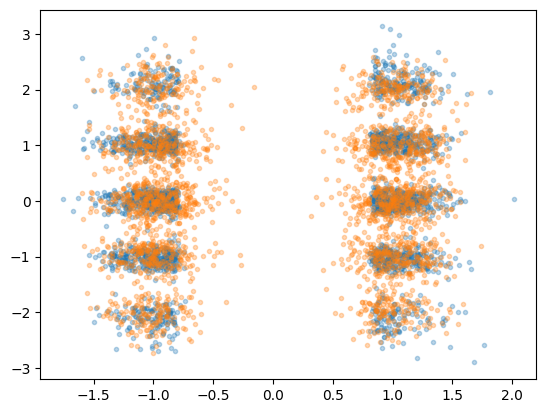

In [33]:
import matplotlib.pyplot as plt

ode_targ = out_dict[-1]["aug_ode"][:, -1,:2]
sde_targ = out_dict[-1]["aug"][:, -1,:2]

plt.plot(ode_targ[:, 0], ode_targ[:, 1], ".",  alpha=0.3)
plt.plot(sde_targ[:, 0], sde_targ[:, 1], ".", alpha=0.3)

In [34]:
funnel_config.model.source(out_dict[-1]["aug_ode"][:, 0,:2])

Array([-2.0167863, -3.0173876, -2.4773479, ..., -1.9960619, -4.4359746,
       -4.351254 ], dtype=float32)

In [35]:
 funnel_config.model.sigma

1.075

In [36]:
import distrax
import numpy as np

equi_normal2 = distrax.MultivariateNormalDiag( np.zeros(2) , funnel_config.model.sigma * np.ones(2))

equi_normal2.log_prob(out_dict[-1]["aug_ode"][:, 0,:2])

Array([-2.0167863, -3.0173876, -2.4773479, ..., -1.9960619, -4.4359746,
       -4.351254 ], dtype=float32)

In [37]:
funnel_config.model.target

<function dds.targets.toy_targets.mixture_well.<locals>.log_p_pure(x)>

In [38]:
cake = funnel_config.trainer.lnz_pf_estimator(
    out_dict[-1]["aug_ode"], funnel_config.model.source, funnel_config.model.target, debug=False)

In [39]:
cake

Array(-1.8177376, dtype=float32)

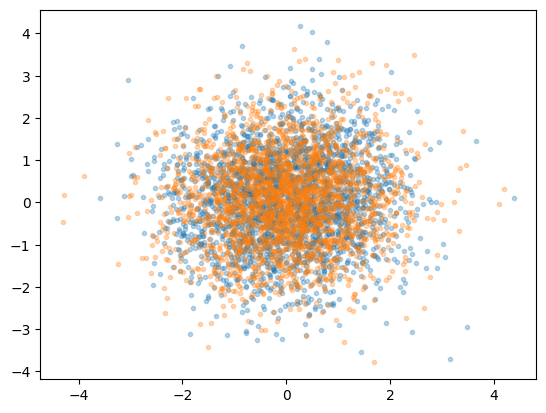

In [40]:
import matplotlib.pyplot as plt

timestep = 30

ode_targ = out_dict[-1]["aug_ode"][:, timestep,:2]
sde_targ = out_dict[-1]["aug"][:, timestep,:2]

plt.plot(ode_targ[:, 0], ode_targ[:, 1], ".",  alpha=0.3)
plt.plot(sde_targ[:, 0], sde_targ[:, 1], ".",  alpha=0.3)

In [41]:
out_dict[-1]["aug"][:, -1,:2]

Array([[ 1.4490311 , -2.3735125 ],
       [ 0.97292465,  1.134153  ],
       [ 0.94887763, -1.9814427 ],
       ...,
       [ 0.92277294,  0.7615415 ],
       [ 1.0962561 ,  1.9025291 ],
       [ 1.3008525 ,  0.999722  ]], dtype=float32)

In [42]:
funnel_config.model.step_scheme_key 

'cos_sq'

In [43]:
funnel_config

{'dataset': {}, 'eval': {'seeds': 30}, 'model': {'activation': <function gelu at 0x17b25a8c0>, 'activation_dict': {'gelu': <function gelu at 0x17b25a8c0>, 'relu': <jax._src.custom_derivatives.custom_jvp object at 0x118c09f30>, 'swish': <PjitFunction of <function silu at 0x118c0db40>>}, 'activation_key': 'gelu', 'alpha': 0.6875, 'batch_size': 300, 'detach_path': False, 'detach_stl_drift': False, 'dt': 0.05, 'elbo_batch_size': 2000, 'exp_dds': True, 'fully_connected_units': [64, 64], 'input_dim': 2, 'learn_betas': False, 'log': False, 'm': 1.0, 'network_dict': {'pis': <class 'dds.drift_nets.PISGRADNet'>, 'pisudp': <class 'dds.drift_nets_udp.UDPPISGRADNet'>, 'vanilla': <class 'dds.drift_nets.SimpleDriftNet'>, 'vanilla_udp': <class 'dds.drift_nets_udp.UDPSimpleDriftNet'>}, 'network_key': 'pis', 'plot_dist': <function mixture_well.<locals>.plot_distribution at 0x17d70d510>, 'reference_process_dict': {'oudstl': <class 'dds.stl_samplers.AugmentedOUDFollmerSDESTL'>, 'oududp': <class 'dds.udp_s